In [83]:
%matplotlib inline #This code is written to prevent warning messages
import warnings
warnings.filterwarnings('ignore')

UsageError: unrecognized arguments: #This code is written to prevent warning messages


## Loading Libraries

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import acf, pacf
import re
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
#Visualization library
import bokeh
from bokeh.io import output_file,output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource as cds
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.palettes import BuGn8

In [139]:
tcs_df = get_history(symbol = 'TCS',start = date(2012,1,1),end = date(2018,12,31)) #getting tcs data here
tcs_df.head(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,TCS,EQ,1160.65,1161.00,1185.95,1153.0,1177.90,1178.6,1173.10,1124271,1.318877e+14,36353,528384,0.4700
2012-01-03,TCS,EQ,1178.60,1183.25,1209.90,1180.0,1197.00,1197.6,1199.44,1354442,1.624578e+14,55143,631300,0.4661
2012-01-04,TCS,EQ,1197.60,1204.90,1205.00,1169.3,1170.75,1173.0,1185.00,1193385,1.414160e+14,44225,602549,0.5049


In [140]:
#here we are resetting and the setting the indices again so to convert the dates into datetime
tcs_df.reset_index(level=0, inplace=True) 
tcs_df['Date'] = pd.to_datetime(tcs_df['Date'])
tcs_df.index = tcs_df['Date']
tcs_df.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,TCS,EQ,1160.65,1161.00,1185.95,1153.0,1177.90,1178.6,1173.10,1124271,1.318877e+14,36353,528384,0.4700
2012-01-03,2012-01-03,TCS,EQ,1178.60,1183.25,1209.90,1180.0,1197.00,1197.6,1199.44,1354442,1.624578e+14,55143,631300,0.4661
2012-01-04,2012-01-04,TCS,EQ,1197.60,1204.90,1205.00,1169.3,1170.75,1173.0,1185.00,1193385,1.414160e+14,44225,602549,0.5049


In [141]:
tcs_df.shape

(1734, 15)

In [142]:
tcs_df.isnull().values.any()

False

In [143]:
info_df = get_history(symbol = 'INFY',start = date(2012,1,1),end = date(2018,12,31))#extracting the data of infosys here.
info_df.head(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,INFY,EQ,2767.65,2759.2,2816.65,2742.00,2808.0,2808.95,2781.66,728272,2.025804e+14,40168,308586,0.4237
2012-01-03,INFY,EQ,2808.95,2824.1,2886.95,2820.00,2865.2,2864.30,2862.91,1112876,3.186066e+14,68763,574103,0.5159
2012-01-04,INFY,EQ,2864.30,2845.0,2875.00,2841.05,2845.0,2854.40,2855.72,917678,2.620627e+14,46897,452371,0.4930


In [144]:
#Resetting and setting the indices for the same reasons as above
info_df.reset_index(level=0, inplace=True)
info_df['Date'] = pd.to_datetime(info_df['Date'])
info_df.index = info_df['Date']
info_df.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,INFY,EQ,2767.65,2759.2,2816.65,2742.00,2808.0,2808.95,2781.66,728272,2.025804e+14,40168,308586,0.4237
2012-01-03,2012-01-03,INFY,EQ,2808.95,2824.1,2886.95,2820.00,2865.2,2864.30,2862.91,1112876,3.186066e+14,68763,574103,0.5159
2012-01-04,2012-01-04,INFY,EQ,2864.30,2845.0,2875.00,2841.05,2845.0,2854.40,2855.72,917678,2.620627e+14,46897,452371,0.4930


In [145]:
info_df.shape

(1734, 15)

In [146]:
info_df.isnull().values.any()#checking for any null values in our dataset

False

In [147]:
nifty_it_df = get_history(symbol = 'NIFTYIT',start = date(2012,1,1),end = date(2018,12,31),index = True)
nifty_it_df.head(3)#extracting nifty it dataset

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2012-01-02,6130.15,6233.35,6104.70,6217.70,7018359.0,4.401200e+09
2012-01-03,6248.85,6384.25,6248.85,6356.15,15563978.0,7.955100e+09
2012-01-04,6346.80,6379.05,6307.65,6325.10,13940794.0,6.927800e+09


In [148]:
nifty_it_df.reset_index(level=0, inplace=True)
nifty_it_df['Date'] = pd.to_datetime(nifty_it_df['Date'])
nifty_it_df.index = nifty_it_df['Date']
nifty_it_df.head(3)

,Date,Open,High,Low,Close,Volume,Turnover
Date,,,,,,,
2012-01-02,2012-01-02,6130.15,6233.35,6104.70,6217.70,7018359.0,4.401200e+09
2012-01-03,2012-01-03,6248.85,6384.25,6248.85,6356.15,15563978.0,7.955100e+09
2012-01-04,2012-01-04,6346.80,6379.05,6307.65,6325.10,13940794.0,6.927800e+09


In [149]:
nifty_it_df.shape

(1734, 7)

In [150]:
info_df.shape

(1734, 15)

In [151]:
nifty_it_df.isnull().values.any()# Here below we can see that we are getting a null value in our dataset, therefore we will-
#- now remove those rows containing null values

True

In [152]:
nifty_it_df = nifty_it_df.dropna()#here we are dropping rows containing null values

In [153]:
nifty_it_df.shape #we can see that only 8 rows were removed as the number of rows have reduced from 1734 to 1726

(1726, 7)

In [154]:
nifty_it_df.isnull().values.any()#Again checking for any null values

False

In [155]:
#Sorting all the datasets in accordance with with the index which is date
tcs_df = tcs_df.sort_index(ascending=True, axis=0)
info_df = info_df.sort_index(ascending=True, axis=0)
nifty_it_df = nifty_it_df.sort_index(ascending = True, axis=0)

# Part-1

### 1.) Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function.

In [180]:
tcs_df_1 = tcs_df
info_df_1 = info_df
nifty_it_df_1 = nifty_it_df

In [181]:
week = [4,16,28,40,52]
def moving_average(data,window):
    """This function calculates moving average
    
    Input: The inputs to the function are data and window. Where data represents the stock market dataset
           containing the 'Close' column which represents our closing stock price and the window represents
           the time period we want to calculate our moving average
    Output: This function returns the dataset containing moving average for the 'Close' column in our dataset.
    """
    data_1 = pd.DataFrame()#Creating an empty dataframe
    data_1['closing_price'] = data['Close'].resample('W').mean()#converting the dataset into weekly dataset and then taking weekly-
    #averages.
    strin_1 = ['4 weeks moving avg','16 weeks moving avg','28 weeks moving avg','40 weeks moving avg','52 weeks moving avg']
    for i in range(len(window)):
        sma = data_1['closing_price'].rolling(window[i]).mean()#rolling(window[i]).mean() calculates the moving average over-
        #-the window specified.
        data_1[strin_1[i]] = sma
    return data_1

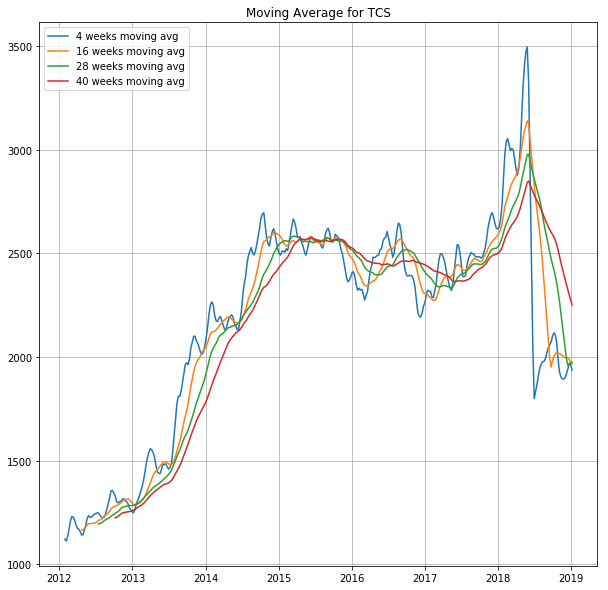

In [182]:
#Calculating moving average of tcs data and plotting it
mam = moving_average(tcs_df_1,week)
plt.figure(figsize=(10, 10))
plt.plot(mam['4 weeks moving avg'],label='4 weeks moving avg' )
plt.plot(mam['16 weeks moving avg'],label='16 weeks moving avg')
plt.plot(mam['28 weeks moving avg'],label='28 weeks moving avg')
plt.plot(mam['40 weeks moving avg'],label='40 weeks moving avg')
plt.title("Moving Average for TCS")
plt.legend()
plt.grid()
plt.show()

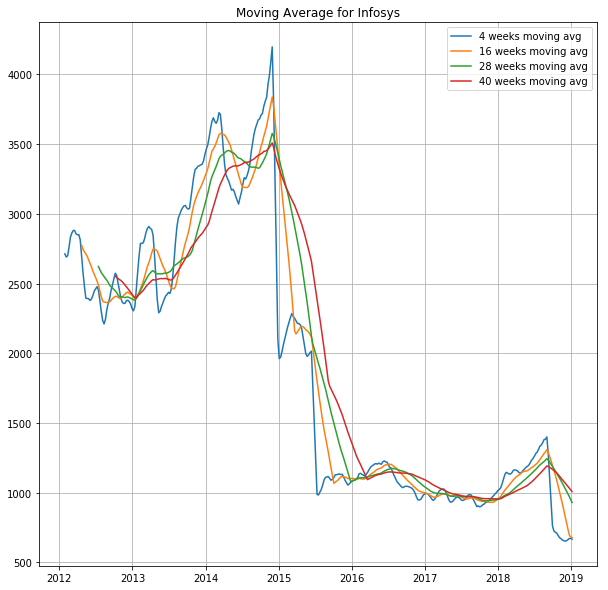

In [185]:
#Calculating moving average of infosys data and plotting it
mam = moving_average(info_df_1,week)
plt.figure(figsize=(10, 10))
plt.plot(mam['4 weeks moving avg'],label='4 weeks moving avg' )
plt.plot(mam['16 weeks moving avg'],label='16 weeks moving avg')
plt.plot(mam['28 weeks moving avg'],label='28 weeks moving avg')
plt.plot(mam['40 weeks moving avg'],label='40 weeks moving avg')
plt.title("Moving Average for Infosys")
plt.legend()
plt.grid()
plt.show()#Calculating moving average of infosys data

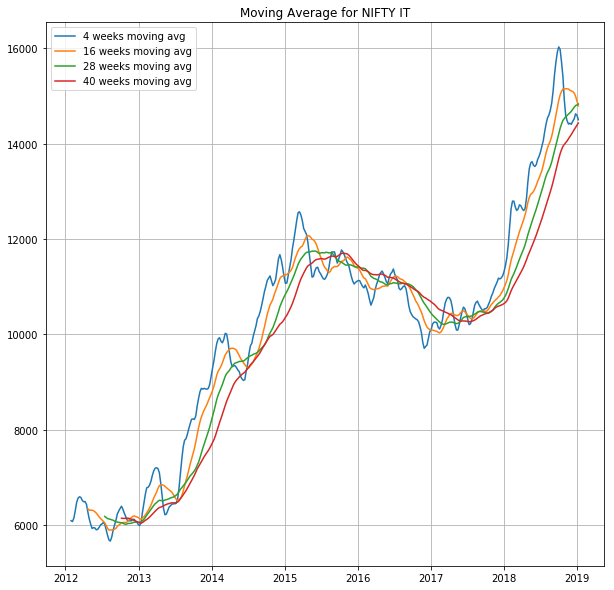

In [186]:
#Calculating moving average of tcs data and plotting it
mam = moving_average(nifty_it_df_1,week)
plt.figure(figsize=(10, 10))
plt.plot(mam['4 weeks moving avg'],label='4 weeks moving avg' )
plt.plot(mam['16 weeks moving avg'],label='16 weeks moving avg')
plt.plot(mam['28 weeks moving avg'],label='28 weeks moving avg')
plt.plot(mam['40 weeks moving avg'],label='40 weeks moving avg')
plt.title("Moving Average for NIFTY IT")
plt.legend()
plt.grid()
plt.show() #Calculating moving average of nifty_it

### 2.) Create rolling window of size 10 on each stock/index. Handle unequal time series due to stock market holidays. You should look to increase your rolling window size to 75 and see how the data looks like. Remember they will create stress on your laptop RAM load.

In [187]:
tcs_df_1 = tcs_df
info_df_1 = info_df
nifty_it_df_1 = nifty_it_df

In [188]:
week = [10,75]
def moving_average(data,window):#This function has been created to find rolling averages
    data_1 = pd.DataFrame()
    data_1['closing_price'] = data['Close'].resample('W').mean()#converting the dataset into weekly dataset and then taking weekly-
    #averages.
    strin_1 = ['10 Weeks rolling average','75 Weeks rolling average']
    for i in range(len(window)):
        sma = data_1['closing_price'].rolling(window[i]).mean()
        data_1[strin_1[i]] = sma
    return data_1

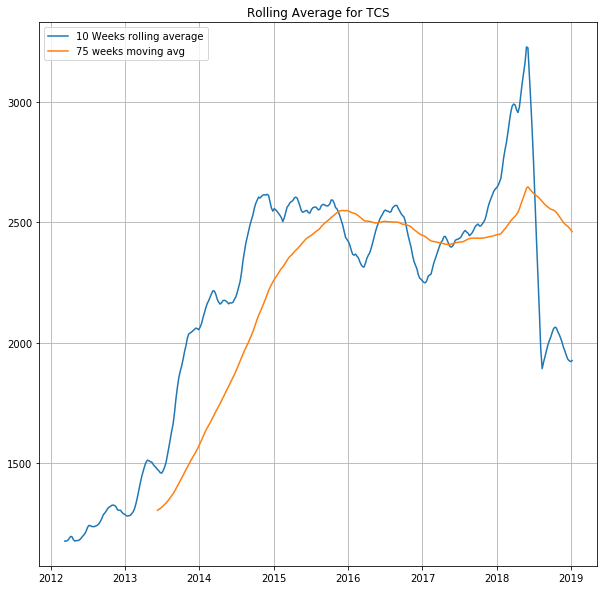

In [192]:
#Calculating moving average of tcs data and plotting it
mam = moving_average(tcs_df_1,week)
plt.figure(figsize=(10, 10))
plt.plot(mam['10 Weeks rolling average'],label='10 Weeks rolling average' )
plt.plot(mam['75 Weeks rolling average'],label='75 weeks moving avg')
plt.title("Rolling Average for TCS")
plt.legend()
plt.grid()
plt.show()

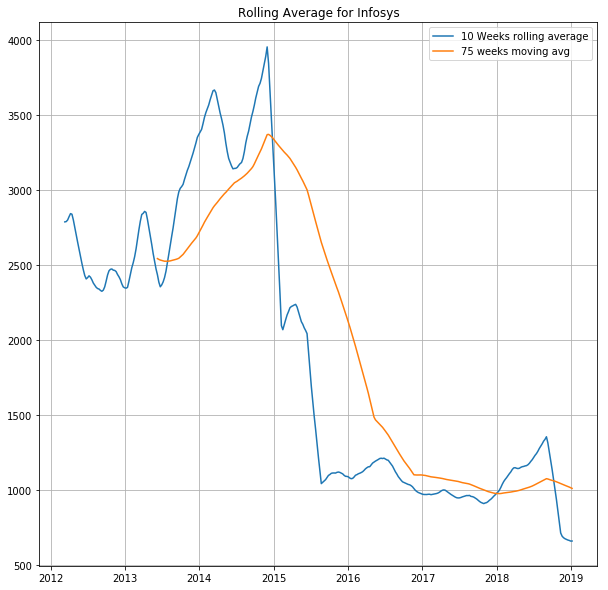

In [193]:
#Calculating moving average of infosys data and plotting it
mam = moving_average(info_df_1,week)
plt.figure(figsize=(10, 10))
plt.plot(mam['10 Weeks rolling average'],label='10 Weeks rolling average' )
plt.plot(mam['75 Weeks rolling average'],label='75 weeks moving avg')
plt.title("Rolling Average for Infosys")
plt.legend()
plt.grid()
plt.show()

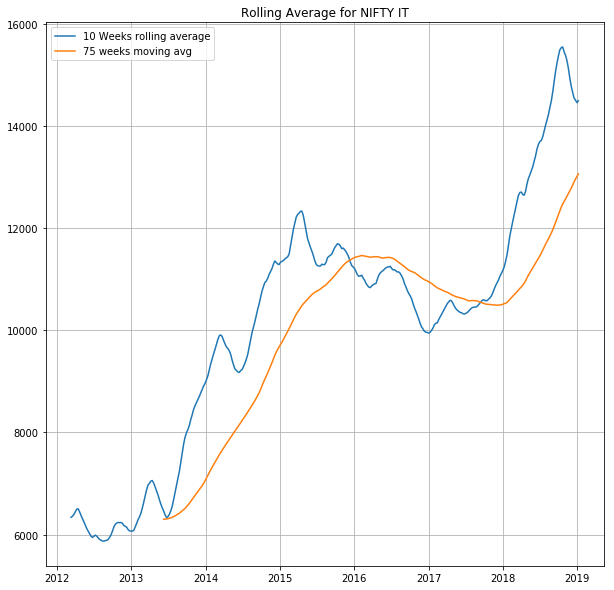

In [194]:
#Calculating moving average of nifty it data and plotting it
mam = moving_average(nifty_it_df_1,week)
plt.figure(figsize=(10, 10))
plt.plot(mam['10 Weeks rolling average'],label='10 Weeks rolling average' )
plt.plot(mam['75 Weeks rolling average'],label='75 weeks moving avg')
plt.title("Rolling Average for NIFTY IT")
plt.legend()
plt.grid()
plt.show()

### 3.) Create the following dummy time series:
  <pre> 3.1 Volume shocks - If volume traded is 10% higher/lower than previous day - make a 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.</pre>
   <pre>3.2 Price shocks - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.</pre>
   <pre>3.3 Pricing black swan - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.</pre>
   <pre>3.4 Pricing shock without volume shock - based on points a & b - Make a 0/1 dummy time series.</pre>

#### 3.1) Volume shock and volume shock direction

In [31]:
tcs_df_1 = tcs_df
info_df_1 = info_df
nifty_it_df_1 = nifty_it_df

In [32]:
def volume_shock(data): #Function for calculating volume shocks
    data['Shifted_Volume'] = data['Volume'].shift(1)
    data["volume_shock"] = ((abs(data["Shifted_Volume"] - data["Volume"])/data["Volume"]*100)  > 10).astype(int)
    return data

def vol_shock_dir(data):#function for calculating volume shock direction
    data["vol_shock_dir"] = ((data['Shifted_Volume']-data['Volume']) > 0).astype(int)
    return data

In [33]:
vol_shock = volume_shock(tcs_df_1)
tcs_df_1 = vol_shock_dir(vol_shock)
tcs_df_1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Shifted_Volume,volume_shock,vol_shock_dir
Date,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,TCS,EQ,1160.65,1161.00,1185.95,1153.00,1177.90,1178.60,1173.10,1124271,1.318877e+14,36353,528384,0.4700,NaN,0,0
2012-01-03,2012-01-03,TCS,EQ,1178.60,1183.25,1209.90,1180.00,1197.00,1197.60,1199.44,1354442,1.624578e+14,55143,631300,0.4661,1124271.0,1,0
2012-01-04,2012-01-04,TCS,EQ,1197.60,1204.90,1205.00,1169.30,1170.75,1173.00,1185.00,1193385,1.414160e+14,44225,602549,0.5049,1354442.0,1,1
2012-01-05,2012-01-05,TCS,EQ,1173.00,1172.80,1185.00,1167.35,1171.20,1172.00,1175.53,1273656,1.497225e+14,37736,862675,0.6773,1193385.0,0,0
2012-01-06,2012-01-06,TCS,EQ,1172.00,1166.00,1188.35,1156.80,1170.95,1169.40,1169.03,1059864,1.239010e+14,37310,465283,0.4390,1273656.0,1,1
2012-01-07,2012-01-07,TCS,EQ,1169.40,1170.00,1178.75,1170.00,1172.00,1172.50,1173.74,67051,7.870057e+12,2497,18442,0.2750,1059864.0,1,1
2012-01-09,2012-01-09,TCS,EQ,1172.50,1171.00,1179.70,1165.25,1172.30,1171.35,1172.89,754514,8.849595e+13,22071,402948,0.5340,67051.0,1,0
2012-01-10,2012-01-10,TCS,EQ,1171.35,1175.00,1185.50,1158.50,1168.00,1165.40,1167.80,1795895,2.097240e+14,44885,1233041,0.6866,754514.0,1,0
2012-01-11,2012-01-11,TCS,EQ,1165.40,1171.40,1175.00,1133.15,1135.55,1137.00,1147.96,2837690,3.257563e+14,86738,2061035,0.7263,1795895.0,1,0


In [34]:
vol_shock = volume_shock(info_df_1)
info_df_1 = vol_shock_dir(vol_shock)
info_df_1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Shifted_Volume,volume_shock,vol_shock_dir
Date,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,INFY,EQ,2767.65,2759.20,2816.65,2742.00,2808.00,2808.95,2781.66,728272,2.025804e+14,40168,308586,0.4237,NaN,0,0
2012-01-03,2012-01-03,INFY,EQ,2808.95,2824.10,2886.95,2820.00,2865.20,2864.30,2862.91,1112876,3.186066e+14,68763,574103,0.5159,728272.0,1,0
2012-01-04,2012-01-04,INFY,EQ,2864.30,2845.00,2875.00,2841.05,2845.00,2854.40,2855.72,917678,2.620627e+14,46897,452371,0.4930,1112876.0,1,1
2012-01-05,2012-01-05,INFY,EQ,2854.40,2839.20,2876.00,2831.45,2840.00,2840.15,2853.86,890659,2.541818e+14,50037,457603,0.5138,917678.0,0,1
2012-01-06,2012-01-06,INFY,EQ,2840.15,2838.00,2867.60,2811.10,2829.10,2832.15,2835.26,885954,2.511910e+14,42072,376852,0.4254,890659.0,0,1
2012-01-07,2012-01-07,INFY,EQ,2832.15,2838.90,2851.50,2828.05,2834.95,2835.20,2839.03,95521,2.711867e+13,3720,21548,0.2256,885954.0,1,1
2012-01-09,2012-01-09,INFY,EQ,2835.20,2847.50,2866.30,2817.20,2827.80,2836.55,2841.07,1033223,2.935463e+14,42650,555345,0.5375,95521.0,1,0
2012-01-10,2012-01-10,INFY,EQ,2836.55,2870.00,2875.40,2850.20,2864.15,2863.60,2861.40,1397397,3.998509e+14,55820,1014075,0.7257,1033223.0,1,0
2012-01-11,2012-01-11,INFY,EQ,2863.60,2868.00,2894.90,2813.00,2819.00,2826.60,2847.09,1724475,4.909736e+14,90102,896134,0.5197,1397397.0,1,0


In [35]:
vol_shock = volume_shock(nifty_it_df_1)
nifty_it_df_1 = vol_shock_dir(vol_shock)
nifty_it_df_1

,Date,Open,High,Low,Close,Volume,Turnover,Shifted_Volume,volume_shock,vol_shock_dir
Date,,,,,,,,,,
2012-01-02,2012-01-02,6130.15,6233.35,6104.70,6217.70,7018359.0,4.401200e+09,NaN,0,0
2012-01-03,2012-01-03,6248.85,6384.25,6248.85,6356.15,15563978.0,7.955100e+09,7018359.0,1,0
2012-01-04,2012-01-04,6346.80,6379.05,6307.65,6325.10,13940794.0,6.927800e+09,15563978.0,1,1
2012-01-05,2012-01-05,6302.80,6373.80,6286.80,6301.55,9557314.0,5.738100e+09,13940794.0,1,1
2012-01-06,2012-01-06,6288.05,6347.70,6239.50,6281.10,8826771.0,5.367000e+09,9557314.0,0,1
2012-01-07,2012-01-07,6291.80,6318.65,6280.75,6289.85,936672.0,4.642000e+08,8826771.0,1,1
2012-01-09,2012-01-09,6304.45,6333.05,6261.10,6287.90,12888939.0,5.859800e+09,936672.0,1,0
2012-01-10,2012-01-10,6340.10,6357.90,6314.05,6331.75,16035750.0,8.832800e+09,12888939.0,1,0
2012-01-11,2012-01-11,6347.65,6392.15,6226.35,6249.30,15235305.0,1.028780e+10,16035750.0,0,1


#### 3.2) Price Shock and price shock direction

In [36]:
tcs_df_2 = tcs_df
info_df_2 = info_df
nifty_it_df_2 = nifty_it_df

In [37]:
def price_shock(data):#Function for calculating price shock
    data['Shifted_Price'] = data['Close'].shift(1)
    data["price_shock"] = ((abs(data["Shifted_Price"] - data['Close'])/data['Close']*100)  > 2).astype(int)
    return data

In [38]:
def price_shock_dir(data):#function for calculating price shock direction
    data["price_shock_dir"] = ((data['Shifted_Price']-data['Close']) > 0).astype(int)
    return data

In [39]:
price_shock_ = price_shock(tcs_df_2)
tcs_df_2 = price_shock_dir(price_shock_)
tcs_df_2

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,Shifted_Volume,volume_shock,vol_shock_dir,Shifted_Price,price_shock,price_shock_dir
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,TCS,EQ,1160.65,1161.00,1185.95,1153.00,1177.90,1178.60,1173.10,...,1.318877e+14,36353,528384,0.4700,NaN,0,0,NaN,0,0
2012-01-03,2012-01-03,TCS,EQ,1178.60,1183.25,1209.90,1180.00,1197.00,1197.60,1199.44,...,1.624578e+14,55143,631300,0.4661,1124271.0,1,0,1178.60,0,0
2012-01-04,2012-01-04,TCS,EQ,1197.60,1204.90,1205.00,1169.30,1170.75,1173.00,1185.00,...,1.414160e+14,44225,602549,0.5049,1354442.0,1,1,1197.60,1,1
2012-01-05,2012-01-05,TCS,EQ,1173.00,1172.80,1185.00,1167.35,1171.20,1172.00,1175.53,...,1.497225e+14,37736,862675,0.6773,1193385.0,0,0,1173.00,0,1
2012-01-06,2012-01-06,TCS,EQ,1172.00,1166.00,1188.35,1156.80,1170.95,1169.40,1169.03,...,1.239010e+14,37310,465283,0.4390,1273656.0,1,1,1172.00,0,1
2012-01-07,2012-01-07,TCS,EQ,1169.40,1170.00,1178.75,1170.00,1172.00,1172.50,1173.74,...,7.870057e+12,2497,18442,0.2750,1059864.0,1,1,1169.40,0,0
2012-01-09,2012-01-09,TCS,EQ,1172.50,1171.00,1179.70,1165.25,1172.30,1171.35,1172.89,...,8.849595e+13,22071,402948,0.5340,67051.0,1,0,1172.50,0,1
2012-01-10,2012-01-10,TCS,EQ,1171.35,1175.00,1185.50,1158.50,1168.00,1165.40,1167.80,...,2.097240e+14,44885,1233041,0.6866,754514.0,1,0,1171.35,0,1
2012-01-11,2012-01-11,TCS,EQ,1165.40,1171.40,1175.00,1133.15,1135.55,1137.00,1147.96,...,3.257563e+14,86738,2061035,0.7263,1795895.0,1,0,1165.40,1,1


In [40]:
price_shock_ = price_shock(info_df_2)
info_df_2 = price_shock_dir(price_shock_)
info_df_2

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,Shifted_Volume,volume_shock,vol_shock_dir,Shifted_Price,price_shock,price_shock_dir
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,INFY,EQ,2767.65,2759.20,2816.65,2742.00,2808.00,2808.95,2781.66,...,2.025804e+14,40168,308586,0.4237,NaN,0,0,NaN,0,0
2012-01-03,2012-01-03,INFY,EQ,2808.95,2824.10,2886.95,2820.00,2865.20,2864.30,2862.91,...,3.186066e+14,68763,574103,0.5159,728272.0,1,0,2808.95,0,0
2012-01-04,2012-01-04,INFY,EQ,2864.30,2845.00,2875.00,2841.05,2845.00,2854.40,2855.72,...,2.620627e+14,46897,452371,0.4930,1112876.0,1,1,2864.30,0,1
2012-01-05,2012-01-05,INFY,EQ,2854.40,2839.20,2876.00,2831.45,2840.00,2840.15,2853.86,...,2.541818e+14,50037,457603,0.5138,917678.0,0,1,2854.40,0,1
2012-01-06,2012-01-06,INFY,EQ,2840.15,2838.00,2867.60,2811.10,2829.10,2832.15,2835.26,...,2.511910e+14,42072,376852,0.4254,890659.0,0,1,2840.15,0,1
2012-01-07,2012-01-07,INFY,EQ,2832.15,2838.90,2851.50,2828.05,2834.95,2835.20,2839.03,...,2.711867e+13,3720,21548,0.2256,885954.0,1,1,2832.15,0,0
2012-01-09,2012-01-09,INFY,EQ,2835.20,2847.50,2866.30,2817.20,2827.80,2836.55,2841.07,...,2.935463e+14,42650,555345,0.5375,95521.0,1,0,2835.20,0,0
2012-01-10,2012-01-10,INFY,EQ,2836.55,2870.00,2875.40,2850.20,2864.15,2863.60,2861.40,...,3.998509e+14,55820,1014075,0.7257,1033223.0,1,0,2836.55,0,0
2012-01-11,2012-01-11,INFY,EQ,2863.60,2868.00,2894.90,2813.00,2819.00,2826.60,2847.09,...,4.909736e+14,90102,896134,0.5197,1397397.0,1,0,2863.60,0,1


In [41]:
price_shock_1= price_shock(nifty_it_df_2)
nifty_it_df_2 = price_shock_dir(price_shock_1)
nifty_it_df_2

,Date,Open,High,Low,Close,Volume,Turnover,Shifted_Volume,volume_shock,vol_shock_dir,Shifted_Price,price_shock,price_shock_dir
Date,,,,,,,,,,,,,
2012-01-02,2012-01-02,6130.15,6233.35,6104.70,6217.70,7018359.0,4.401200e+09,NaN,0,0,NaN,0,0
2012-01-03,2012-01-03,6248.85,6384.25,6248.85,6356.15,15563978.0,7.955100e+09,7018359.0,1,0,6217.70,1,0
2012-01-04,2012-01-04,6346.80,6379.05,6307.65,6325.10,13940794.0,6.927800e+09,15563978.0,1,1,6356.15,0,1
2012-01-05,2012-01-05,6302.80,6373.80,6286.80,6301.55,9557314.0,5.738100e+09,13940794.0,1,1,6325.10,0,1
2012-01-06,2012-01-06,6288.05,6347.70,6239.50,6281.10,8826771.0,5.367000e+09,9557314.0,0,1,6301.55,0,1
2012-01-07,2012-01-07,6291.80,6318.65,6280.75,6289.85,936672.0,4.642000e+08,8826771.0,1,1,6281.10,0,0
2012-01-09,2012-01-09,6304.45,6333.05,6261.10,6287.90,12888939.0,5.859800e+09,936672.0,1,0,6289.85,0,1
2012-01-10,2012-01-10,6340.10,6357.90,6314.05,6331.75,16035750.0,8.832800e+09,12888939.0,1,0,6287.90,0,0
2012-01-11,2012-01-11,6347.65,6392.15,6226.35,6249.30,15235305.0,1.028780e+10,16035750.0,0,1,6331.75,0,1


#### 3.3) Pricing Shock without volume shock

In [42]:
def psvs(data): #Function for observing the dates where pricing shock occurred without volume shock
    data['price_w/o_vol'] = 1
    for i in range(data.shape[0]):
        data['price_w/o_vol'].iloc[i] = ((data['volume_shock'].iloc[i]==0) and (data['price_shock'].iloc[i]==1)).astype('int')
    return data

In [43]:
tcs_df_3 = psvs(tcs_df_2)
tcs_df_3

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Shifted_Volume,volume_shock,vol_shock_dir,Shifted_Price,price_shock,price_shock_dir,price_w/o_vol
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,TCS,EQ,1160.65,1161.00,1185.95,1153.00,1177.90,1178.60,1173.10,...,36353,528384,0.4700,NaN,0,0,NaN,0,0,0
2012-01-03,2012-01-03,TCS,EQ,1178.60,1183.25,1209.90,1180.00,1197.00,1197.60,1199.44,...,55143,631300,0.4661,1124271.0,1,0,1178.60,0,0,0
2012-01-04,2012-01-04,TCS,EQ,1197.60,1204.90,1205.00,1169.30,1170.75,1173.00,1185.00,...,44225,602549,0.5049,1354442.0,1,1,1197.60,1,1,0
2012-01-05,2012-01-05,TCS,EQ,1173.00,1172.80,1185.00,1167.35,1171.20,1172.00,1175.53,...,37736,862675,0.6773,1193385.0,0,0,1173.00,0,1,0
2012-01-06,2012-01-06,TCS,EQ,1172.00,1166.00,1188.35,1156.80,1170.95,1169.40,1169.03,...,37310,465283,0.4390,1273656.0,1,1,1172.00,0,1,0
2012-01-07,2012-01-07,TCS,EQ,1169.40,1170.00,1178.75,1170.00,1172.00,1172.50,1173.74,...,2497,18442,0.2750,1059864.0,1,1,1169.40,0,0,0
2012-01-09,2012-01-09,TCS,EQ,1172.50,1171.00,1179.70,1165.25,1172.30,1171.35,1172.89,...,22071,402948,0.5340,67051.0,1,0,1172.50,0,1,0
2012-01-10,2012-01-10,TCS,EQ,1171.35,1175.00,1185.50,1158.50,1168.00,1165.40,1167.80,...,44885,1233041,0.6866,754514.0,1,0,1171.35,0,1,0
2012-01-11,2012-01-11,TCS,EQ,1165.40,1171.40,1175.00,1133.15,1135.55,1137.00,1147.96,...,86738,2061035,0.7263,1795895.0,1,0,1165.40,1,1,0


In [44]:
info_df_3 = psvs(info_df_2)
info_df_3

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Shifted_Volume,volume_shock,vol_shock_dir,Shifted_Price,price_shock,price_shock_dir,price_w/o_vol
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,INFY,EQ,2767.65,2759.20,2816.65,2742.00,2808.00,2808.95,2781.66,...,40168,308586,0.4237,NaN,0,0,NaN,0,0,0
2012-01-03,2012-01-03,INFY,EQ,2808.95,2824.10,2886.95,2820.00,2865.20,2864.30,2862.91,...,68763,574103,0.5159,728272.0,1,0,2808.95,0,0,0
2012-01-04,2012-01-04,INFY,EQ,2864.30,2845.00,2875.00,2841.05,2845.00,2854.40,2855.72,...,46897,452371,0.4930,1112876.0,1,1,2864.30,0,1,0
2012-01-05,2012-01-05,INFY,EQ,2854.40,2839.20,2876.00,2831.45,2840.00,2840.15,2853.86,...,50037,457603,0.5138,917678.0,0,1,2854.40,0,1,0
2012-01-06,2012-01-06,INFY,EQ,2840.15,2838.00,2867.60,2811.10,2829.10,2832.15,2835.26,...,42072,376852,0.4254,890659.0,0,1,2840.15,0,1,0
2012-01-07,2012-01-07,INFY,EQ,2832.15,2838.90,2851.50,2828.05,2834.95,2835.20,2839.03,...,3720,21548,0.2256,885954.0,1,1,2832.15,0,0,0
2012-01-09,2012-01-09,INFY,EQ,2835.20,2847.50,2866.30,2817.20,2827.80,2836.55,2841.07,...,42650,555345,0.5375,95521.0,1,0,2835.20,0,0,0
2012-01-10,2012-01-10,INFY,EQ,2836.55,2870.00,2875.40,2850.20,2864.15,2863.60,2861.40,...,55820,1014075,0.7257,1033223.0,1,0,2836.55,0,0,0
2012-01-11,2012-01-11,INFY,EQ,2863.60,2868.00,2894.90,2813.00,2819.00,2826.60,2847.09,...,90102,896134,0.5197,1397397.0,1,0,2863.60,0,1,0


In [45]:
nifty_it_df_3 = psvs(nifty_it_df_2)
nifty_it_df_3

,Date,Open,High,Low,Close,Volume,Turnover,Shifted_Volume,volume_shock,vol_shock_dir,Shifted_Price,price_shock,price_shock_dir,price_w/o_vol
Date,,,,,,,,,,,,,,
2012-01-02,2012-01-02,6130.15,6233.35,6104.70,6217.70,7018359.0,4.401200e+09,NaN,0,0,NaN,0,0,0
2012-01-03,2012-01-03,6248.85,6384.25,6248.85,6356.15,15563978.0,7.955100e+09,7018359.0,1,0,6217.70,1,0,0
2012-01-04,2012-01-04,6346.80,6379.05,6307.65,6325.10,13940794.0,6.927800e+09,15563978.0,1,1,6356.15,0,1,0
2012-01-05,2012-01-05,6302.80,6373.80,6286.80,6301.55,9557314.0,5.738100e+09,13940794.0,1,1,6325.10,0,1,0
2012-01-06,2012-01-06,6288.05,6347.70,6239.50,6281.10,8826771.0,5.367000e+09,9557314.0,0,1,6301.55,0,1,0
2012-01-07,2012-01-07,6291.80,6318.65,6280.75,6289.85,936672.0,4.642000e+08,8826771.0,1,1,6281.10,0,0,0
2012-01-09,2012-01-09,6304.45,6333.05,6261.10,6287.90,12888939.0,5.859800e+09,936672.0,1,0,6289.85,0,1,0
2012-01-10,2012-01-10,6340.10,6357.90,6314.05,6331.75,16035750.0,8.832800e+09,12888939.0,1,0,6287.90,0,0,0
2012-01-11,2012-01-11,6347.65,6392.15,6226.35,6249.30,15235305.0,1.028780e+10,16035750.0,0,1,6331.75,0,1,0


## Part 2: Visualization with Bokeh

In [85]:
output_notebook()

Loading BokehJS ...

In [86]:
def figure_1(data):
    fig = figure(height = 800,
                width = 5000,
                x_axis_type = 'datetime',x_axis_label = 'Date',y_axis_label = 'Close')
    fig.line(data.index,data['Close'],line_color = 'blue',alpha = 0.9,line_width = 3)#here we are plotting line plot between-
    #-date and closing prices.
    fig.square(data.index,data['Close']*data["price_w/o_vol"], color = 'Green', size=6)#here we are plotting squares which-
    #- represent price shocks without volume shock.
    k = data['Close']*data["volume_shock"]
    fig.line(data.index,k,line_color = 'red',alpha = 1.0,line_width = 3)#Here I have tried to Color timeseries between two volume-
    #-shocks in a different color 
    show(fig)

In [87]:
output_file('timeseries_plot.html')

In [88]:
figure_1(tcs_df_3)

In [89]:
figure_1(info_df_3)

In [90]:
figure_1(nifty_it_df_3)

In [91]:
def pacf_plot(data):# plot for partial autocorrelation function
    lags = 25 #Here we will take data from past 1 day till past 25 days to predict future value
    list_1 = list(range(lags))
    p = figure(height=500,width = 900,x_axis_type = 'datetime',x_axis_label = 'lags')
    pac = pacf(data["Close"], nlags=lags)
    p.vbar(x=list_1, top=pac, width=0.9)
    show(p)

In [92]:
pacf_plot(tcs_df_3)

In [93]:
pacf_plot(info_df_3)

In [94]:
pacf_plot(nifty_it_df_3)

In [95]:
def acf_plot(data): 
    lags = 25 #Here we will take data from past 1 day till past 25 days to predict future value
    list_1 = list(range(lags))
    p = figure(height=500,width = 900,x_axis_type = 'datetime',x_axis_label = 'Date',y_axis_label = 'Close')
    ac = acf(data["Close"], nlags=lags)
    p.vbar(x=list_1, top=ac, width=0.9)
    show(p)

In [96]:
acf_plot(tcs_df_3)

In [97]:
acf_plot(info_df_3)

In [98]:
acf_plot(nifty_it_df_3)

### Part 3:(data modelling - optional)

#### 3.1.1 On TCS dataset(using SGD regressor, which is a form of linear regression technique)

In [99]:
tcs_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Shifted_Volume,volume_shock,vol_shock_dir,Shifted_Price,price_shock,price_shock_dir,price_w/o_vol
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,TCS,EQ,1160.65,1161.00,1185.95,1153.00,1177.90,1178.6,1173.10,...,36353,528384,0.4700,NaN,0,0,NaN,0,0,0
2012-01-03,2012-01-03,TCS,EQ,1178.60,1183.25,1209.90,1180.00,1197.00,1197.6,1199.44,...,55143,631300,0.4661,1124271.0,1,0,1178.6,0,0,0
2012-01-04,2012-01-04,TCS,EQ,1197.60,1204.90,1205.00,1169.30,1170.75,1173.0,1185.00,...,44225,602549,0.5049,1354442.0,1,1,1197.6,1,1,0
2012-01-05,2012-01-05,TCS,EQ,1173.00,1172.80,1185.00,1167.35,1171.20,1172.0,1175.53,...,37736,862675,0.6773,1193385.0,0,0,1173.0,0,1,0
2012-01-06,2012-01-06,TCS,EQ,1172.00,1166.00,1188.35,1156.80,1170.95,1169.4,1169.03,...,37310,465283,0.4390,1273656.0,1,1,1172.0,0,1,0


In [100]:
new_data = pd.DataFrame(index=range(0,len(tcs_df)),columns=['Date', 'Close'])

for i in range(0,len(tcs_df)): #putting Date and Close columns in our new dataframe created above
    new_data['Date'][i] = tcs_df['Date'][i]
    new_data['Close'][i] = tcs_df['Close'][i]
new_data.head()

,Date,Close
0,2012-01-02 00:00:00,1178.6
1,2012-01-03 00:00:00,1197.6
2,2012-01-04 00:00:00,1173
3,2012-01-05 00:00:00,1172
4,2012-01-06 00:00:00,1169.4


In [101]:
#Here we are doing Feature engineering to increase the number of features
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)
add_datepart(new_data,'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

In [102]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1178.6,2012,1,1,2,0,2,False,False,False,False,False,False
1,1197.6,2012,1,1,3,1,3,False,False,False,False,False,False
2,1173,2012,1,1,4,2,4,False,False,False,False,False,False
3,1172,2012,1,1,5,3,5,False,False,False,False,False,False
4,1169.4,2012,1,1,6,4,6,False,False,False,False,False,False


In [103]:
#Here we are converting the False in our dataset to 0 and True in our-
#- dataset to 1
new_data = new_data.applymap(lambda x: 1 if x == True else x)
new_data = new_data.applymap(lambda x: 0 if x == False else x)

In [104]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1178.6,2012,1,1,2,0,2,0,0,0,0,0,0
1,1197.6,2012,1,1,3,1,3,0,0,0,0,0,0
2,1173.0,2012,1,1,4,2,4,0,0,0,0,0,0
3,1172.0,2012,1,1,5,3,5,0,0,0,0,0,0
4,1169.4,2012,1,1,6,4,6,0,0,0,0,0,0


In [105]:
new_data.shape

(1734, 13)

In [106]:
#We are doing here time split
d_train = new_data[0:1350]
d_test = new_data[1350:1734]

In [107]:
#Breaking our dataset into train and test
x_train = d_train.drop('Close', axis=1, inplace=False)
x_test = d_test.drop('Close', axis=1, inplace=False)
y_train = d_train['Close']
y_test = d_test['Close']

In [108]:
#Standardizing our dataset
standardized_train = StandardScaler().fit_transform(x_train)
standardized_test = StandardScaler().fit_transform(x_test)

In [109]:
#Doing grid search cross validation for our hyperparameters
sgd = SGDRegressor(learning_rate = 'optimal')
param_grid = {'alpha':[10**6,10**5,10**4,10**3,10**2,10**1,10**0,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6],
             'penalty':['l1','l2']
             }
gscv = GridSearchCV(sgd,param_grid,cv=10)
gscv.fit(standardized_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
#If warnings continue to show just scroll through the warning there you will find our best hyperparameter printed

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

Best HyperParameter:  {'penalty': 'l2', 'alpha': 1}


/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

In [110]:
#Testing SGD Regressor on Test dataset
sgd = SGDRegressor(penalty = 'l2',alpha = 1,learning_rate = 'optimal')
sgd.fit(standardized_train,y_train)
pred = sgd.predict(standardized_test)

In [111]:
#Calculating MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_test,pred)

24.192037265770196

#### 3.1.2) On TCS dataset(Using SVM Regressor)

In [112]:
#Here we are doing GRid Search cross validation on SVR
svr = SVR()
param_grid = {'C':[10**6,10**5,10**4,10**3,10**2,10**1,10**0,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6]
             }
gscv = GridSearchCV(svr,param_grid,cv=10,n_jobs = 16)
gscv.fit(standardized_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)

Best HyperParameter:  {'C': 1000}


In [113]:
#Here we are testing our model on test dataset
svr = SVR(C = 1000 )
svr.fit(standardized_train,y_train)
pred = svr.predict(standardized_test)

In [114]:
#Calculating MAPE
mean_absolute_percentage_error(y_test,pred)

33.72030779870499

### Now we will perform the same steps we performed above on Infosys dataset

#### 3.2.1 On INFO dataset (Using SGD Regressor)

In [123]:
info_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Shifted_Volume,volume_shock,vol_shock_dir,Shifted_Price,price_shock,price_shock_dir,price_w/o_vol
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02,INFY,EQ,2767.65,2759.2,2816.65,2742.00,2808.0,2808.95,2781.66,...,40168,308586,0.4237,NaN,0,0,NaN,0,0,0
2012-01-03,2012-01-03,INFY,EQ,2808.95,2824.1,2886.95,2820.00,2865.2,2864.30,2862.91,...,68763,574103,0.5159,728272.0,1,0,2808.95,0,0,0
2012-01-04,2012-01-04,INFY,EQ,2864.30,2845.0,2875.00,2841.05,2845.0,2854.40,2855.72,...,46897,452371,0.4930,1112876.0,1,1,2864.30,0,1,0
2012-01-05,2012-01-05,INFY,EQ,2854.40,2839.2,2876.00,2831.45,2840.0,2840.15,2853.86,...,50037,457603,0.5138,917678.0,0,1,2854.40,0,1,0
2012-01-06,2012-01-06,INFY,EQ,2840.15,2838.0,2867.60,2811.10,2829.1,2832.15,2835.26,...,42072,376852,0.4254,890659.0,0,1,2840.15,0,1,0


In [124]:
new_data = pd.DataFrame(index=range(0,len(info_df)),columns=['Date', 'Close'])

for i in range(0,len(info_df)):
    new_data['Date'][i] = info_df['Date'][i]
    new_data['Close'][i] = info_df['Close'][i]
new_data.head()

,Date,Close
0,2012-01-02 00:00:00,2808.95
1,2012-01-03 00:00:00,2864.3
2,2012-01-04 00:00:00,2854.4
3,2012-01-05 00:00:00,2840.15
4,2012-01-06 00:00:00,2832.15


In [125]:
add_datepart(new_data,'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

In [126]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,2808.95,2012,1,1,2,0,2,False,False,False,False,False,False
1,2864.3,2012,1,1,3,1,3,False,False,False,False,False,False
2,2854.4,2012,1,1,4,2,4,False,False,False,False,False,False
3,2840.15,2012,1,1,5,3,5,False,False,False,False,False,False
4,2832.15,2012,1,1,6,4,6,False,False,False,False,False,False


In [127]:
new_data = new_data.applymap(lambda x: 1 if x == True else x)
new_data = new_data.applymap(lambda x: 0 if x == False else x)

In [128]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,2808.95,2012,1,1,2,0,2,0,0,0,0,0,0
1,2864.30,2012,1,1,3,1,3,0,0,0,0,0,0
2,2854.40,2012,1,1,4,2,4,0,0,0,0,0,0
3,2840.15,2012,1,1,5,3,5,0,0,0,0,0,0
4,2832.15,2012,1,1,6,4,6,0,0,0,0,0,0


In [129]:
#We are doing here time split
d_train = new_data[0:1350]
d_test = new_data[1350:1734]

In [130]:
x_train = d_train.drop('Close', axis=1, inplace=False)
x_test = d_test.drop('Close', axis=1, inplace=False)
y_train = d_train['Close']
y_test = d_test['Close']

In [131]:
standardized_train = StandardScaler().fit_transform(x_train)
standardized_test = StandardScaler().fit_transform(x_test)

In [132]:
sgd = SGDRegressor(learning_rate = 'optimal')
param_grid = {'alpha':[10**6,10**5,10**4,10**3,10**2,10**1,10**0,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6],
             'penalty':['l1','l2']
             }
gscv = GridSearchCV(sgd,param_grid,cv=10)
gscv.fit(standardized_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

Best HyperParameter:  {'penalty': 'l2', 'alpha': 100}


/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/site-packages/skl

In [133]:
sgd = SGDRegressor(penalty = 'l2',alpha = 100,learning_rate = 'optimal')
sgd.fit(standardized_train,y_train)
pred = sgd.predict(standardized_test)

In [134]:
mean_absolute_percentage_error(y_test,pred)

49.13021493659177

#### 3.2.2 On INFO dataset (Using SVM SVR)

In [135]:
svr = SVR()
param_grid = {'C':[10**6,10**5,10**4,10**3,10**2,10**1,10**0,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6]
             }
gscv = GridSearchCV(svr,param_grid,cv=10,n_jobs = 16)
gscv.fit(standardized_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)

Best HyperParameter:  {'C': 100}


In [136]:
svr = SVR(C =100 )
svr.fit(standardized_train,y_train)
pred = svr.predict(standardized_test)

In [137]:
mean_absolute_percentage_error(y_test,pred)

99.12715897168091

# Conclusion

<pre>We can see from above that SGD Regressor performs better than SVM Regressor but there is one problem that, with SVR we have two hyperparameters epsilon and C. Above we did only Cross Validation using C but we didnt consider epsilon. This was because the computation complexity of SVR is more. So we still cant judge if SVR is performing worst on stock datasets as compared to SGD. But one thing I can say is that SVR is slower than SGD Regressor.</pre> 